#Stock Trend Prediction comparing stocks S&P500 and DJI

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import tensorflow as tf

plt.style.use('fivethirtyeight')
%matplotlib inline

Using the Ticker class which helps enable us to download the price history for a single symbol, in this case for SP500 and DJI. Then query the historical prices, using the history methods. Querying data or retrieving data from 10 years ago to now. Using the columns to predict whether the stock price will go up or down.

In [207]:
import yfinance as yf
from datetime import datetime, timedelta

# Define 5 years ago from today
end_date = datetime.today()
start_date = end_date - timedelta(days=10*365)  # Approximate 10 years

# Get the ticker (e.g., Dow Jones Industrial Average)
dji_data = yf.Ticker("^DJI")

# Get historical data from 10 years ago to today
dji = dji_data.history(start=start_date, end=end_date)

In [208]:
dji

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-05-26 00:00:00-04:00,18229.750000,18229.750000,17990.019531,18041.539062,109440000,0.0,0.0
2015-05-27 00:00:00-04:00,18045.080078,18190.349609,18045.080078,18162.990234,96400000,0.0,0.0
2015-05-28 00:00:00-04:00,18154.140625,18154.140625,18066.400391,18126.119141,67510000,0.0,0.0
2015-05-29 00:00:00-04:00,18128.119141,18128.119141,17967.740234,18010.679688,139810000,0.0,0.0
2015-06-01 00:00:00-04:00,18017.820312,18105.830078,17982.060547,18040.369141,85640000,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-14 00:00:00-04:00,42150.089844,42254.750000,41952.859375,42051.058594,660230000,0.0,0.0
2025-05-15 00:00:00-04:00,41777.980469,42351.421875,41777.980469,42322.750000,736430000,0.0,0.0
2025-05-16 00:00:00-04:00,42356.199219,42663.679688,42232.558594,42654.738281,621250000,0.0,0.0


In [209]:
import yfinance as yf
from datetime import datetime, timedelta

# Define 10 years ago from today
end_date = datetime.today()
start_date = end_date - timedelta(days=10*365)  # Approximate 10 years

# Get the ticker (e.g., Dow Jones Industrial Average)
sp500_data = yf.Ticker("^GSPC")

# Get historical data from 10 years ago to today
sp500 = sp500_data.history(start=start_date, end=end_date)

In [210]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-05-26 00:00:00-04:00,2125.340088,2125.340088,2099.179932,2104.199951,3342130000,0.0,0.0
2015-05-27 00:00:00-04:00,2105.129883,2126.219971,2105.129883,2123.479980,3127960000,0.0,0.0
2015-05-28 00:00:00-04:00,2122.270020,2122.270020,2112.860107,2120.790039,2980350000,0.0,0.0
2015-05-29 00:00:00-04:00,2120.659912,2120.659912,2104.889893,2107.389893,3927390000,0.0,0.0
2015-06-01 00:00:00-04:00,2108.639893,2119.149902,2102.540039,2111.729980,3011710000,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-14 00:00:00-04:00,5896.740234,5906.549805,5872.109863,5892.580078,5233450000,0.0,0.0
2025-05-15 00:00:00-04:00,5869.819824,5924.209961,5865.160156,5916.930176,4991290000,0.0,0.0
2025-05-16 00:00:00-04:00,5929.089844,5958.620117,5907.359863,5958.379883,4850850000,0.0,0.0


Taking the index of both stocks to be able to slice the data more easily.


In [215]:
sp500.index

DatetimeIndex(['2015-05-26 00:00:00-04:00', '2015-05-27 00:00:00-04:00',
               '2015-05-28 00:00:00-04:00', '2015-05-29 00:00:00-04:00',
               '2015-06-01 00:00:00-04:00', '2015-06-02 00:00:00-04:00',
               '2015-06-03 00:00:00-04:00', '2015-06-04 00:00:00-04:00',
               '2015-06-05 00:00:00-04:00', '2015-06-08 00:00:00-04:00',
               ...
               '2025-05-07 00:00:00-04:00', '2025-05-08 00:00:00-04:00',
               '2025-05-09 00:00:00-04:00', '2025-05-12 00:00:00-04:00',
               '2025-05-13 00:00:00-04:00', '2025-05-14 00:00:00-04:00',
               '2025-05-15 00:00:00-04:00', '2025-05-16 00:00:00-04:00',
               '2025-05-19 00:00:00-04:00', '2025-05-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2513, freq=None)

<Axes: xlabel='Date'>

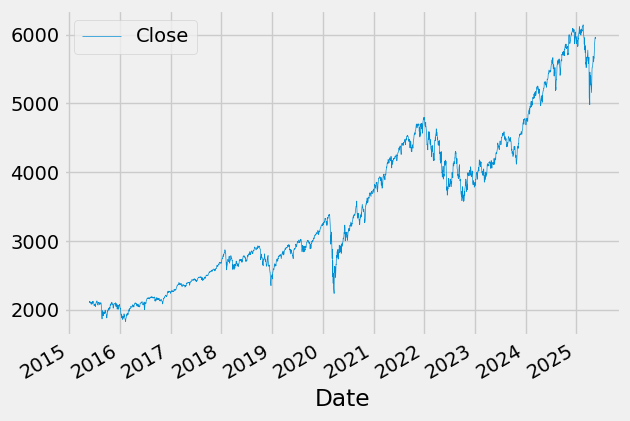

In [216]:
sp500.plot.line(y="Close", linewidth=0.5, use_index=True)

In [217]:
dji.index

DatetimeIndex(['2015-05-26 00:00:00-04:00', '2015-05-27 00:00:00-04:00',
               '2015-05-28 00:00:00-04:00', '2015-05-29 00:00:00-04:00',
               '2015-06-01 00:00:00-04:00', '2015-06-02 00:00:00-04:00',
               '2015-06-03 00:00:00-04:00', '2015-06-04 00:00:00-04:00',
               '2015-06-05 00:00:00-04:00', '2015-06-08 00:00:00-04:00',
               ...
               '2025-05-07 00:00:00-04:00', '2025-05-08 00:00:00-04:00',
               '2025-05-09 00:00:00-04:00', '2025-05-12 00:00:00-04:00',
               '2025-05-13 00:00:00-04:00', '2025-05-14 00:00:00-04:00',
               '2025-05-15 00:00:00-04:00', '2025-05-16 00:00:00-04:00',
               '2025-05-19 00:00:00-04:00', '2025-05-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2513, freq=None)

<Axes: xlabel='Date'>

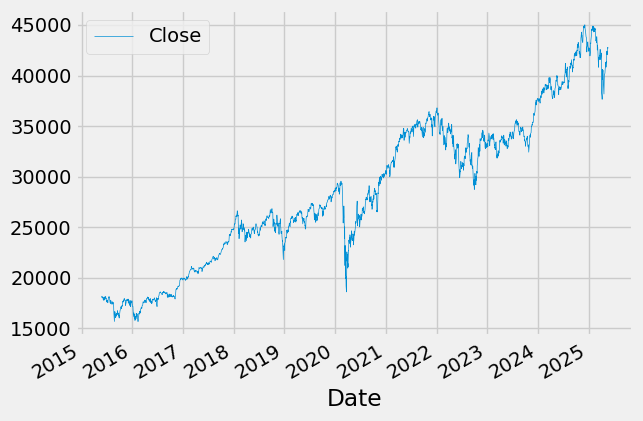

In [218]:
dji.plot.line(y="Close", linewidth=0.5, use_index=True)

#Cleaning the data and removing columns that we don't need


In [219]:
#deleted the Dividends and Stock splits columns in both stock data because we don't need them
print(sp500.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [220]:
del sp500["Dividends"]
del sp500["Stock Splits"]
del dji["Dividends"]
del dji["Stock Splits"]

In [221]:
print(dji.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [222]:
#targeting whether the stock will go up or down. Creating a new column called tomorrow which is going to be tomorrow's price.
sp500["Tomorrow"] = sp500["Close"].shift(-1)
dji["Tomorrow"] = dji["Close"].shift(-1)

Took the closed column and then shifted the prices back by one day. Using the "Close" column to help predict tomorrow's price because that is the most stable since it's the price at the end of the day and the most reliable reference point.

In [223]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2015-05-26 00:00:00-04:00,2125.340088,2125.340088,2099.179932,2104.199951,3342130000,2123.479980
2015-05-27 00:00:00-04:00,2105.129883,2126.219971,2105.129883,2123.479980,3127960000,2120.790039
2015-05-28 00:00:00-04:00,2122.270020,2122.270020,2112.860107,2120.790039,2980350000,2107.389893
2015-05-29 00:00:00-04:00,2120.659912,2120.659912,2104.889893,2107.389893,3927390000,2111.729980
2015-06-01 00:00:00-04:00,2108.639893,2119.149902,2102.540039,2111.729980,3011710000,2109.600098
...,...,...,...,...,...,...
2025-05-14 00:00:00-04:00,5896.740234,5906.549805,5872.109863,5892.580078,5233450000,5916.930176
2025-05-15 00:00:00-04:00,5869.819824,5924.209961,5865.160156,5916.930176,4991290000,5958.379883
2025-05-16 00:00:00-04:00,5929.089844,5958.620117,5907.359863,5958.379883,4850850000,5963.600098


In [224]:
dji

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2015-05-26 00:00:00-04:00,18229.750000,18229.750000,17990.019531,18041.539062,109440000,18162.990234
2015-05-27 00:00:00-04:00,18045.080078,18190.349609,18045.080078,18162.990234,96400000,18126.119141
2015-05-28 00:00:00-04:00,18154.140625,18154.140625,18066.400391,18126.119141,67510000,18010.679688
2015-05-29 00:00:00-04:00,18128.119141,18128.119141,17967.740234,18010.679688,139810000,18040.369141
2015-06-01 00:00:00-04:00,18017.820312,18105.830078,17982.060547,18040.369141,85640000,18011.939453
...,...,...,...,...,...,...
2025-05-14 00:00:00-04:00,42150.089844,42254.750000,41952.859375,42051.058594,660230000,42322.750000
2025-05-15 00:00:00-04:00,41777.980469,42351.421875,41777.980469,42322.750000,736430000,42654.738281
2025-05-16 00:00:00-04:00,42356.199219,42663.679688,42232.558594,42654.738281,621250000,42792.070312


In [225]:
#target is what's being predicted
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
#This will return a boolean value indicating if the stock price tomorrow is greater than today's price
# output is 1 if the price went up and output is 0 if the price went down.

In [226]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2015-05-26 00:00:00-04:00,2125.340088,2125.340088,2099.179932,2104.199951,3342130000,2123.479980,1
2015-05-27 00:00:00-04:00,2105.129883,2126.219971,2105.129883,2123.479980,3127960000,2120.790039,0
2015-05-28 00:00:00-04:00,2122.270020,2122.270020,2112.860107,2120.790039,2980350000,2107.389893,0
2015-05-29 00:00:00-04:00,2120.659912,2120.659912,2104.889893,2107.389893,3927390000,2111.729980,1
2015-06-01 00:00:00-04:00,2108.639893,2119.149902,2102.540039,2111.729980,3011710000,2109.600098,0
...,...,...,...,...,...,...,...
2025-05-14 00:00:00-04:00,5896.740234,5906.549805,5872.109863,5892.580078,5233450000,5916.930176,1
2025-05-15 00:00:00-04:00,5869.819824,5924.209961,5865.160156,5916.930176,4991290000,5958.379883,1
2025-05-16 00:00:00-04:00,5929.089844,5958.620117,5907.359863,5958.379883,4850850000,5963.600098,1


In [227]:
dji["Target"] = (dji["Tomorrow"] > dji["Close"]).astype(int)

In [228]:
dji

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2015-05-26 00:00:00-04:00,18229.750000,18229.750000,17990.019531,18041.539062,109440000,18162.990234,1
2015-05-27 00:00:00-04:00,18045.080078,18190.349609,18045.080078,18162.990234,96400000,18126.119141,0
2015-05-28 00:00:00-04:00,18154.140625,18154.140625,18066.400391,18126.119141,67510000,18010.679688,0
2015-05-29 00:00:00-04:00,18128.119141,18128.119141,17967.740234,18010.679688,139810000,18040.369141,1
2015-06-01 00:00:00-04:00,18017.820312,18105.830078,17982.060547,18040.369141,85640000,18011.939453,0
...,...,...,...,...,...,...,...
2025-05-14 00:00:00-04:00,42150.089844,42254.750000,41952.859375,42051.058594,660230000,42322.750000,1
2025-05-15 00:00:00-04:00,41777.980469,42351.421875,41777.980469,42322.750000,736430000,42654.738281,1
2025-05-16 00:00:00-04:00,42356.199219,42663.679688,42232.558594,42654.738281,621250000,42792.070312,1


#Training an intial machine learning model

RandomForestClassifier combines predictions of multiple decision trees in order to improve accuracy and reduce overfitting. It then averages those results from the decision trees. Putting in a few parameters: n_estimators is the number of individual decision trees being trained, higher the number better accuracy. min_samples_split helps protect against overfitting. random_state will give the same results if you run it twice.

Can't use cross validation in time series data. Splitting data into train and test data. Using the predictor columns to try and predict the columns.

In [229]:
from sklearn.ensemble import RandomForestClassifier

#initialize the model, #min_sample helps avoid overfitting of the decision trees.
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

#splitting data into train and test sets, want the model to learn how to predict the stock price
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors_sp500 = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors_sp500], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

precision score is stating whether the price went up went it said it would go up, the percentage of the time that it was said the price would increase did it actually increase. This is checking for accuracy.

In [230]:
from sklearn.metrics import precision_score
import pandas as pd

pred_sp500 = model.predict(test[predictors_sp500])
pred_sp500 = pd.Series(pred_sp500,index=test.index)
pred_sp500

,0
Date,
2024-12-24 00:00:00-05:00,1
2024-12-26 00:00:00-05:00,1
2024-12-27 00:00:00-05:00,1
2024-12-30 00:00:00-05:00,1
2024-12-31 00:00:00-05:00,1
...,...
2025-05-14 00:00:00-04:00,1
2025-05-15 00:00:00-04:00,1
2025-05-16 00:00:00-04:00,1


Not a very good precision score. Whenever it was stated that the stock price would go up, it only went up 66% of the time. Need to improve model because of this.


In [231]:
precision_score(test["Target"],pred_sp500)

0.6049382716049383

In [232]:
from sklearn.ensemble import RandomForestClassifier

#initialize the model, #min_sample helps avoid overfitting of the decision trees.
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

#splitting data into train and test sets, want the model to learn how to predict the stock price
train = dji.iloc[:-100]
test = dji.iloc[-100:]

predictors_dji = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors_dji], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [233]:
from sklearn.metrics import precision_score
import pandas as pd

pred_dji = model.predict(test[predictors_dji])
pred_dji = pd.Series(pred_dji,index=test.index)
pred_dji

,0
Date,
2024-12-24 00:00:00-05:00,0
2024-12-26 00:00:00-05:00,0
2024-12-27 00:00:00-05:00,0
2024-12-30 00:00:00-05:00,1
2024-12-31 00:00:00-05:00,1
...,...
2025-05-14 00:00:00-04:00,1
2025-05-15 00:00:00-04:00,1
2025-05-16 00:00:00-04:00,1


In [234]:
precision_score(test["Target"],pred_dji)

0.5147058823529411

Plotting the predictions, using concat and combining actual values with the predicted values. The orange line is the prediction, and the blue line is the actual values. From the graph, the predictions were that the market would go up, but in reality it mostly went down.

<Axes: xlabel='Date'>

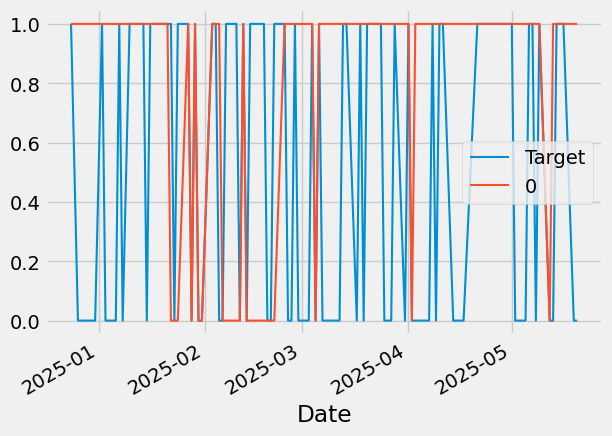

In [235]:
combine_sp500 = pd.concat([test["Target"], pred_sp500], axis = 1)
combine_sp500.plot(linewidth=1.5)

<Axes: xlabel='Date'>

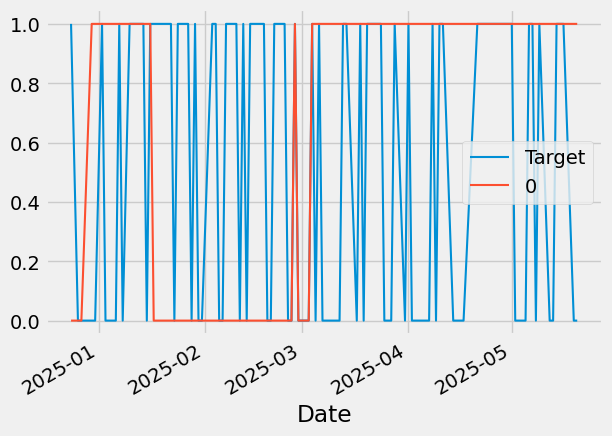

In [236]:
combine_dji = pd.concat([test["Target"], pred_dji], axis = 1 )
combine_dji.plot(linewidth=1.5)

#Building a backtesting system for S&P 500

Being able to test across multiple years of data.

Creating a prediction function. Fitting the model using the training predictors and the target.

In [237]:
def predict(train, test, predictors_sp500, model):
    model.fit(train[predictors_sp500], train["Target"])
    pred_sp500 = model.predict(test[predictors_sp500])
    pred_sp500 = pd.Series(pred_sp500, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], pred_sp500], axis=1)
    return combined


In [241]:
def backtest(data, model, predictors_sp500, start=1250, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions_sp500 = predict(train, test, predictors_sp500, model)
        all_predictions.append(predictions_sp500)

    return pd.concat(all_predictions)

In [242]:
horizons = [2,5,60,250,1000]
new_predictors_sp = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors_sp+= [ratio_column, trend_column]

In [243]:
predictions_sp500 = backtest(sp500, model, predictors_sp500)

In [245]:
predictions_sp500["Predictions"].value_counts()

,count
Predictions,
0,846
1,417


In [246]:
precision_score(predictions_sp500["Target"], predictions_sp500["Predictions"])

0.4940047961630695

In [247]:
predictions_sp500["Target"].value_counts() / predictions_sp500.shape[0]


,count
Target,
1,0.541568
0,0.458432


In [248]:
horizons = [2,5,60,250,1000]
new_predictors_sp = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors_sp+= [ratio_column, trend_column]

In [249]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [250]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2019-05-15 00:00:00-04:00,2820.379883,2858.679932,2815.080078,2850.959961,3140900000,2876.320068,1,1.002911,2.0,1.000382,3.0,0.999666,33.0,1.028063,134.0,1.185831,536.0
2019-05-16 00:00:00-04:00,2855.800049,2892.149902,2855.800049,2876.320068,3338470000,2859.530029,0,1.004428,2.0,1.008884,4.0,1.008018,33.0,1.036975,135.0,1.196005,536.0
2019-05-17 00:00:00-04:00,2858.600098,2885.479980,2854.229980,2859.530029,3316040000,2840.229980,0,0.997073,1.0,1.004536,3.0,1.001639,33.0,1.030704,135.0,1.188658,536.0
2019-05-20 00:00:00-04:00,2841.939941,2853.860107,2831.290039,2840.229980,3293750000,2864.360107,1,0.996614,0.0,0.995772,3.0,0.994602,32.0,1.023589,134.0,1.180276,536.0
2019-05-21 00:00:00-04:00,2854.020020,2868.879883,2854.020020,2864.360107,3223050000,2856.270020,0,1.004230,1.0,1.002127,3.0,1.002653,32.0,1.032077,135.0,1.189931,536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-14 00:00:00-04:00,5896.740234,5906.549805,5872.109863,5892.580078,5233450000,5916.930176,1,1.000512,2.0,1.017816,4.0,1.048393,33.0,1.035385,145.0,1.257203,531.0
2025-05-15 00:00:00-04:00,5869.819824,5924.209961,5865.160156,5916.930176,4991290000,5958.379883,1,1.002062,2.0,1.013167,4.0,1.053435,33.0,1.039219,145.0,1.261924,532.0
2025-05-16 00:00:00-04:00,5929.089844,5958.620117,5907.359863,5958.379883,4850850000,5963.600098,1,1.003490,2.0,1.009942,5.0,1.061316,34.0,1.046013,146.0,1.270287,532.0


In [251]:
model_sp500 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [252]:
def predict(train, test, predictors_sp500, model):
    model.fit(train[predictors_sp500], train["Target"])
    pred_sp500 = model.predict_proba(test[predictors_sp500])[:,1]
    pred_sp500[pred_sp500 >=.6] = 1
    pred_sp500[pred_sp500 <.6] = 0
    pred_sp500 = pd.Series(pred_sp500, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], pred_sp500], axis=1)
    return combined

In [259]:
predictions_sp500 = backtest(sp500, model, new_predictors_sp)


In [260]:
predictions_sp500["Predictions"].value_counts()


,count
Predictions,
1.0,162
0.0,101


In [269]:
precision_score(predictions_sp500["Target"], predictions_sp500["Predictions"])

0.6111111111111112

In [262]:
predictions_sp500["Target"].value_counts() / predictions_sp500.shape[0]


,count
Target,
1,0.585551
0,0.414449


In [263]:
predictions_sp500

,Target,Predictions
Date,,
2024-05-02 00:00:00-04:00,1,0.0
2024-05-03 00:00:00-04:00,1,0.0
2024-05-06 00:00:00-04:00,1,0.0
2024-05-07 00:00:00-04:00,0,0.0
2024-05-08 00:00:00-04:00,1,0.0
...,...,...
2025-05-14 00:00:00-04:00,1,0.0
2025-05-15 00:00:00-04:00,1,0.0
2025-05-16 00:00:00-04:00,1,0.0


#Building backtesting system for DJI

In [265]:
def predict(train, test, predictors_dji, model):
    model.fit(train[predictors_dji], train["Target"])
    pred_dji = model.predict(test[predictors_dji])
    pred_dji = pd.Series(pred_dji, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], pred_dji], axis=1)
    return combined


In [266]:
def backtest(data, model, predictors_dji, start=1250, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors_dji, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [267]:
predictions_dji = backtest(sp500, model, predictors_dji)

In [270]:
predictions_dji["Predictions"].value_counts()


,count
Predictions,
0,248
1,15


In [271]:
precision_score(predictions_dji["Target"], predictions_dji["Predictions"])

0.6

In [272]:
predictions_dji["Target"].value_counts() / predictions_dji.shape[0]


,count
Target,
1,0.585551
0,0.414449


In [273]:
horizons = [2,5,60,250,1000]
new_predictors_dji = []

for horizon in horizons:
    rolling_averages = dji.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    dji[ratio_column] = dji["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    dji[trend_column] = dji.shift(1).rolling(horizon).sum()["Target"]

    new_predictors_dji+= [ratio_column, trend_column]

In [274]:
dji = dji.dropna(subset=dji.columns[dji.columns != "Tomorrow"])

In [275]:
dji

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2019-05-15 00:00:00-04:00,25400.130859,25724.890625,25341.939453,25648.019531,270720000,25862.679688,1,1.002266,2.0,0.999722,3.0,0.984956,31.0,1.013549,133.0,1.204141,538.0
2019-05-16 00:00:00-04:00,25692.140625,25957.630859,25692.140625,25862.679688,320960000,25764.000000,0,1.004167,2.0,1.007819,4.0,0.993258,31.0,1.021847,134.0,1.213780,538.0
2019-05-17 00:00:00-04:00,25719.949219,25948.740234,25657.779297,25764.000000,283760000,25679.900391,0,0.998089,1.0,1.005372,3.0,0.989523,31.0,1.017779,133.0,1.208715,538.0
2019-05-20 00:00:00-04:00,25655.310547,25751.710938,25560.550781,25679.900391,279560000,25877.330078,1,0.998365,0.0,0.999322,3.0,0.986515,30.0,1.014350,132.0,1.204336,538.0
2019-05-21 00:00:00-04:00,25782.339844,25898.269531,25779.609375,25877.330078,260870000,25776.609375,0,1.003829,1.0,1.004306,3.0,0.994236,30.0,1.021980,133.0,1.213150,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-14 00:00:00-04:00,42150.089844,42254.750000,41952.859375,42051.058594,660230000,42322.750000,1,0.998938,0.0,1.004951,2.0,1.015065,29.0,1.008534,132.0,1.159594,531.0
2025-05-15 00:00:00-04:00,41777.980469,42351.421875,41777.980469,42322.750000,736430000,42654.738281,1,1.003220,1.0,1.006852,2.0,1.022572,29.0,1.014816,132.0,1.166825,531.0
2025-05-16 00:00:00-04:00,42356.199219,42663.679688,42232.558594,42654.738281,621250000,42792.070312,1,1.003907,2.0,1.008009,3.0,1.031225,30.0,1.022503,133.0,1.175710,531.0


In [276]:
model_dji = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [277]:
def predict(train, test, predictors_dji, model):
    model.fit(train[predictors_dji], train["Target"])
    pred_dji = model.predict_proba(test[predictors_dji])[:,1]
    pred_dji[pred_dji >=.6] = 1
    pred_dji[pred_dji <.6] = 0
    pred_dji = pd.Series(pred_dji, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], pred_dji], axis=1)
    return combined

In [278]:
predictions_dji = backtest(dji, model, new_predictors_dji)

In [279]:
predictions_dji["Predictions"].value_counts()

,count
Predictions,
0.0,193
1.0,70


In [280]:
precision_score(predictions_dji["Target"], predictions_dji["Predictions"])

0.5285714285714286